In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from loguru import logger
import warnings
import re
import emoji

warnings.filterwarnings("ignore", category=FutureWarning)

In [128]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )
df = pd.read_parquet(datafile)
df.columns
# df.info()

Index(['timestamp', 'message', 'author', 'has_emoji', 'is_topk',
       'message_length', 'has_link', 'timestamp_category', 'hour',
       'day_of_week', 'msg_length'],
      dtype='object')

In [129]:
# Count the amount of messages for top 15 authors.
p1 = (
    df[["author", "message"]]
    .groupby("author")
    .count()
    .sort_values("message", ascending=False)
)

k = 15
topk = p1[:k]

In [130]:
topk_authors = list(topk.index)
topk_authors

['intense-toad',
 'springy-hare',
 'vivid-rhinoceros',
 'carefree-lark',
 'sudsy-jellyfish',
 'radiant-coyote',
 'flexible-platypus',
 'silky-lapwing',
 'cheerful-mule',
 'limber-ostrich',
 'eye-catching-hare',
 'sudsy-eland',
 'zany-trout',
 'cackling-eland',
 'snorting-ibex']

In [131]:
# Select the specific authors
selected_authors = ["intense-toad", "vivid-rhinoceros", "zany-trout"]

# Filter dataframe
df_selected = df[df["author"].isin(selected_authors)]
df_selected.info()
df_selected.head()
df_selected.count()

<class 'pandas.core.frame.DataFrame'>
Index: 1126 entries, 2 to 4563
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1126 non-null   datetime64[ns, UTC]
 1   message             1126 non-null   object             
 2   author              1126 non-null   object             
 3   has_emoji           1126 non-null   bool               
 4   is_topk             1126 non-null   bool               
 5   message_length      1126 non-null   int64              
 6   has_link            1126 non-null   bool               
 7   timestamp_category  1126 non-null   category           
 8   hour                1126 non-null   object             
 9   day_of_week         1126 non-null   int32              
 10  msg_length          1126 non-null   int64              
dtypes: bool(3), category(1), datetime64[ns, UTC](1), int32(1), int64(2), object(3)
memory usage: 70.6+ K

timestamp             1126
message               1126
author                1126
has_emoji             1126
is_topk               1126
message_length        1126
has_link              1126
timestamp_category    1126
hour                  1126
day_of_week           1126
msg_length            1126
dtype: int64

In [132]:
rename_map = {
    "intense-toad": "Voorzitter",
    "vivid-rhinoceros": "Attent bewoner",
    "zany-trout": "Klusjesman bewoner"
}

# Apply the mapping to the 'author' column
df_selected['author'] = df_selected['author'].map(rename_map)

# Verify
df_selected.info()
df_selected.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1126 entries, 2 to 4563
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1126 non-null   datetime64[ns, UTC]
 1   message             1126 non-null   object             
 2   author              1126 non-null   object             
 3   has_emoji           1126 non-null   bool               
 4   is_topk             1126 non-null   bool               
 5   message_length      1126 non-null   int64              
 6   has_link            1126 non-null   bool               
 7   timestamp_category  1126 non-null   category           
 8   hour                1126 non-null   object             
 9   day_of_week         1126 non-null   int32              
 10  msg_length          1126 non-null   int64              
dtypes: bool(3), category(1), datetime64[ns, UTC](1), int32(1), int64(2), object(3)
memory usage: 70.6+ K

/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_71387/2078085591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['author'] = df_selected['author'].map(rename_map)


,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,msg_length
2,2023-02-01 20:52:10+00:00,Voor Ista metertje: 010 2455700,Voorzitter,False,True,31,False,evening,20:52:10,2,31
3,2023-02-01 20:52:45+00:00,"Dit gaat dus via Ista, niet via De Combi",Voorzitter,False,True,40,False,evening,20:52:45,2,40
6,2023-02-02 17:05:04+00:00,Ok dat moet je even VvE beheer bellen op via T...,Voorzitter,False,True,89,False,worktimes,17:05:04,3,89
9,2023-02-03 18:20:10+00:00,https://studiodmn.nl/gemist,Voorzitter,False,True,27,True,evening,18:20:10,4,27
10,2023-02-03 18:20:55+00:00,Voorde enkeling die gisteren niet heeft geluis...,Voorzitter,False,True,81,False,evening,18:20:55,4,81


In [133]:


# selected_authors[0] = "Voorzitter"
# selected_authors[1] = "Attent bewoner"
# selected_authors[2] = "Klusjesman bewoner"

In [134]:
# # Mapping old names to new names
# rename_map = {
#     "intense-toad": "Voorzitter",
#     "vivid-rhinoceros": "Attent bewoner",
#     "zany-trout": "klusjesman"
# }

# # Apply the mapping to the 'author' column
# df_selected['author'] = df_selected['author'].map(rename_map)

# print(df_selected)
# df_selected.columns

In [135]:
# message_counts = df_selected.groupby('author')['message'].count()
# message_counts

In [146]:
# Make sure timestamp is datetime
df_selected['timestamp'] = pd.to_datetime(df_selected['timestamp'])

# Extract year
df_selected['year'] = df_selected['timestamp'].dt.year

# Count messages per author per year
df_counts = (
    df_selected.groupby(['author', 'year'])
    .size()
    .reset_index(name='message_count')
)

# Get min and max year in the data
min_year, max_year = df_counts['year'].min(), df_counts['year'].max()


def count_emojis(text):
    return len([c for c in text if c in emoji.EMOJI_DATA])

df_selected['emoji_count'] = df_selected['message'].apply(count_emojis)

df_selected['question_count'] = df_selected['message'].apply(lambda x: x.count('?'))

# Create a 'year_month' column
df_selected['year_month'] = df_selected['timestamp'].dt.to_period('M').dt.to_timestamp()

# Aggregate counts per author per month
monthly_counts = df_selected.groupby(['year_month', 'author']).size().reset_index(name='message_count')

# Create a 'year_quarter' column
df_selected['year_quarter'] = df_selected['timestamp'].dt.to_period('Q').dt.start_time

# Aggregate counts per author per quarter
quarterly_counts = df_selected.groupby(['year_quarter', 'author']).size().reset_index(name='message_count')


df_selected.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1126 entries, 2 to 4563
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1126 non-null   datetime64[ns, UTC]
 1   message             1126 non-null   object             
 2   author              1126 non-null   object             
 3   has_emoji           1126 non-null   bool               
 4   is_topk             1126 non-null   bool               
 5   message_length      1126 non-null   int64              
 6   has_link            1126 non-null   bool               
 7   timestamp_category  1126 non-null   category           
 8   hour                1126 non-null   object             
 9   day_of_week         1126 non-null   int32              
 10  msg_length          1126 non-null   int64              
 11  year                1126 non-null   int32              
 12  emoji_count         1126 non-null   int

/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_71387/2182533052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['timestamp'] = pd.to_datetime(df_selected['timestamp'])
/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_71387/2182533052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['year'] = df_selected['timestamp'].dt.year
/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_71387/2182533052.py:21: SettingWithCopyWarning: 
A value is trying to be s

In [137]:
# # Plot violin plot
# plt.figure(figsize=(10,6))
# sns.violinplot(
#     data=df_counts,
#     x='author',
#     y='message_count',
#     inner='box',  # shows quartiles inside violin
#     cut=0
# )

# # Find the authors with max messages per year
# max_per_year = (
#     df_counts.loc[df_counts.groupby('year')['message_count'].idxmax()]
# )

# # Overlay scatterplot to highlight max authors per year
# sns.scatterplot(
#     data=max_per_year,
#     x='author',
#     y='message_count',
#     color='yellow',
#     edgecolor='black',
#     s=120,  # size of the highlight
#     marker='o',
#     zorder=10  # make sure points appear on top
# )

# # Title with years
# plt.title(f"Message Distribution per Author ({min_year}–{max_year})")
# plt.ylabel('Messages per Year')
# plt.xlabel('Author')
# plt.show()

"""
intense-toad dominates heavily

The distribution is wide and tall, meaning this author consistently sends many more messages compared to the others.

The yellow dots confirm that intense-toad is the top sender across all the years shown (2023–2025).


vivid-rhinoceros has moderate but lower activity

The distribution shows some variability (between ~30 and ~110 messages per year), but still far behind intense-toad.

This author never reached the top in any year (no yellow markers).



zany-trout is the least active

The distribution is narrow and centered very low (~30–40 messages per year).

Very stable but minimal contribution.

Clear imbalance in participation

The conversation is dominated by a single author (intense-toad), while the other two are marginal participants.

This kind of imbalance often means the dataset’s message flow is largely driven by one person, with others being secondary contributors.
"""

'\nintense-toad dominates heavily\n\nThe distribution is wide and tall, meaning this author consistently sends many more messages compared to the others.\n\nThe yellow dots confirm that intense-toad is the top sender across all the years shown (2023–2025).\n\n\nvivid-rhinoceros has moderate but lower activity\n\nThe distribution shows some variability (between ~30 and ~110 messages per year), but still far behind intense-toad.\n\nThis author never reached the top in any year (no yellow markers).\n\n\n\nzany-trout is the least active\n\nThe distribution is narrow and centered very low (~30–40 messages per year).\n\nVery stable but minimal contribution.\n\nClear imbalance in participation\n\nThe conversation is dominated by a single author (intense-toad), while the other two are marginal participants.\n\nThis kind of imbalance often means the dataset’s message flow is largely driven by one person, with others being secondary contributors.\n'

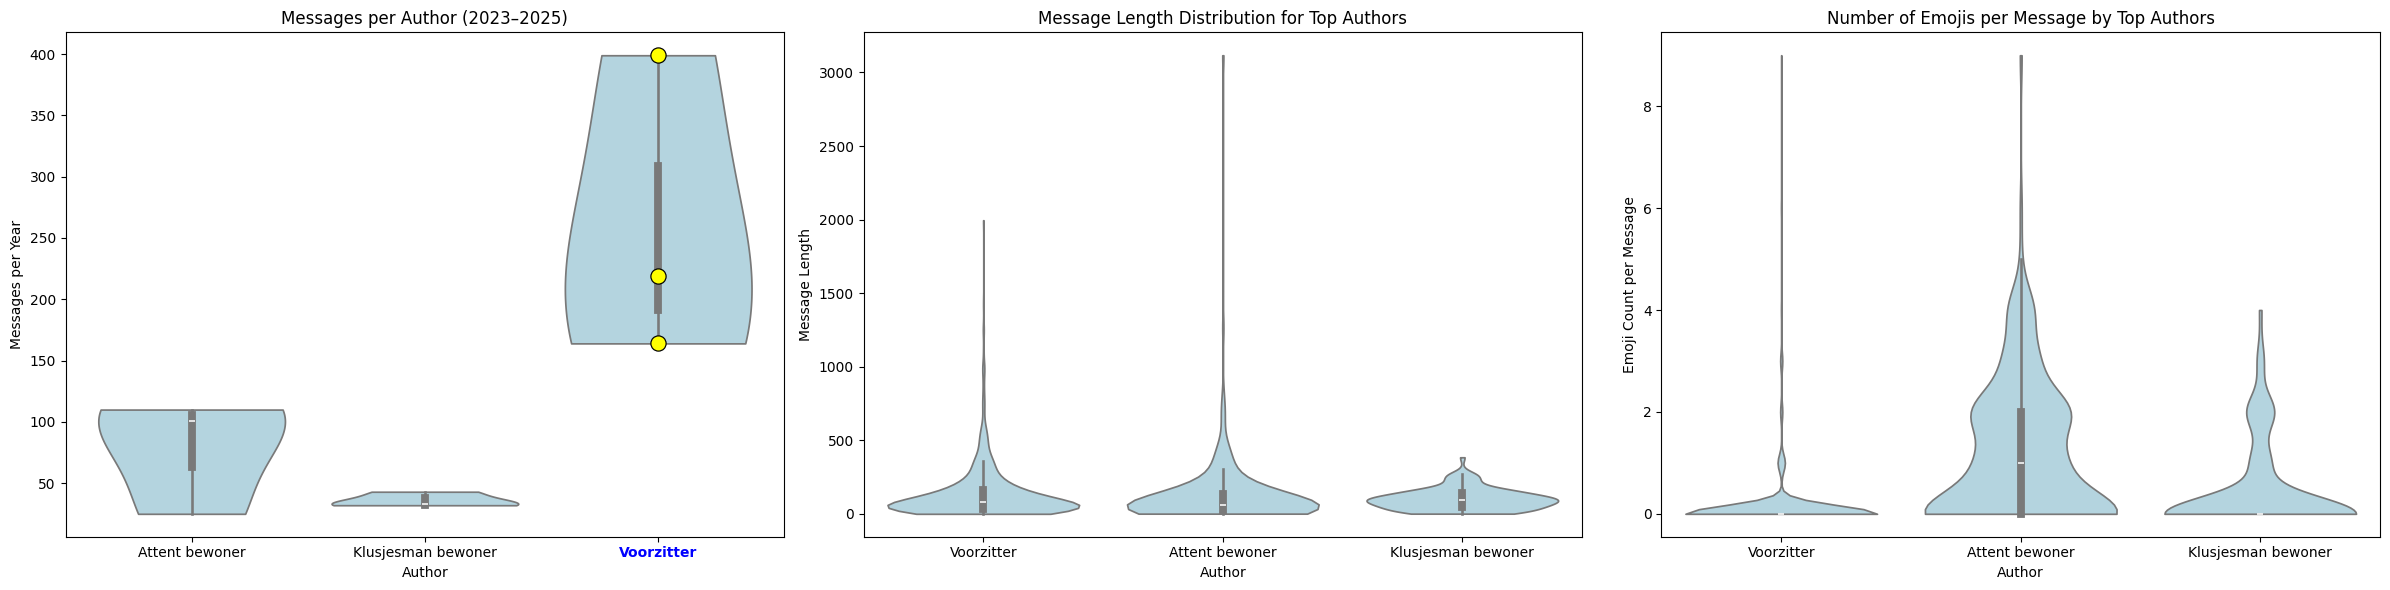

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure emoji_count exists
if 'emoji_count' not in df_selected.columns:
    import emoji
    def count_emojis(text):
        return len([c for c in text if c in emoji.EMOJI_DATA])
    df_selected['emoji_count'] = df_selected['message'].apply(count_emojis)

# Create subplots with 3 plots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # 3 plots

# === First plot: message_count distribution ===
sns.violinplot(
    ax=axes[0],
    data=df_counts,
    x='author',
    y='message_count',
    inner='box',
    cut=0,
    palette=["#ADD8E6"] * len(df_counts['author'].unique())
)
# Highlight max authors per year
max_per_year = df_counts.loc[df_counts.groupby('year')['message_count'].idxmax()]
sns.scatterplot(
    ax=axes[0],
    data=max_per_year,
    x='author',
    y='message_count',
    color='yellow',
    edgecolor='black',
    s=120,
    marker='o',
    zorder=10
)
axes[0].set_title(f"Messages per Author ({min_year}–{max_year})")
axes[0].set_ylabel('Messages per Year')
axes[0].set_xlabel('Author')
# Bold and blue the author with most total messages
most_messages_author = df_counts.groupby('author')['message_count'].sum().idxmax()
for tick in axes[0].get_xticklabels():
    if tick.get_text() == most_messages_author:
        tick.set_fontweight('bold')
        tick.set_color('blue')

# === Second plot: message length distribution ===
sns.violinplot(
    ax=axes[1],
    data=df_selected,
    x='author',
    y='msg_length',
    inner='box',
    cut=0,
    palette=["#ADD8E6"] * len(selected_authors)
)
axes[1].set_title("Message Length Distribution for Top Authors")
axes[1].set_ylabel("Message Length")
axes[1].set_xlabel("Author")

# === Third plot: emoji count distribution ===
sns.violinplot(
    ax=axes[2],
    data=df_selected,
    x='author',
    y='emoji_count',
    inner='box',
    cut=0,
    palette=["#ADD8E6"] * len(selected_authors)
)
axes[2].set_title("Number of Emojis per Message by Top Authors")
axes[2].set_ylabel("Emoji Count per Message")
axes[2].set_xlabel("Author")

plt.tight_layout()
plt.show()


/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_71387/2087133246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['question_count'] = df_selected['message'].apply(lambda x: x.count('?'))


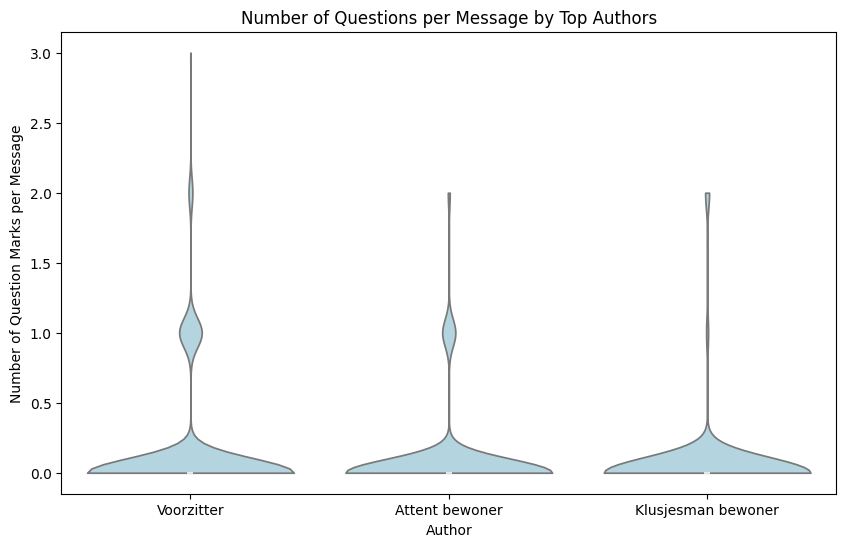

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_selected is already filtered for top authors and renamed
# Count number of question marks per message
df_selected['question_count'] = df_selected['message'].apply(lambda x: x.count('?'))

# Create a violin plot
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df_selected,
    x='author',
    y='question_count',
    inner='box',
    cut=0,
    palette=["#ADD8E6"] * len(selected_authors)
)

plt.title("Number of Questions per Message by Top Authors")
plt.xlabel("Author")
plt.ylabel("Number of Question Marks per Message")
plt.show()


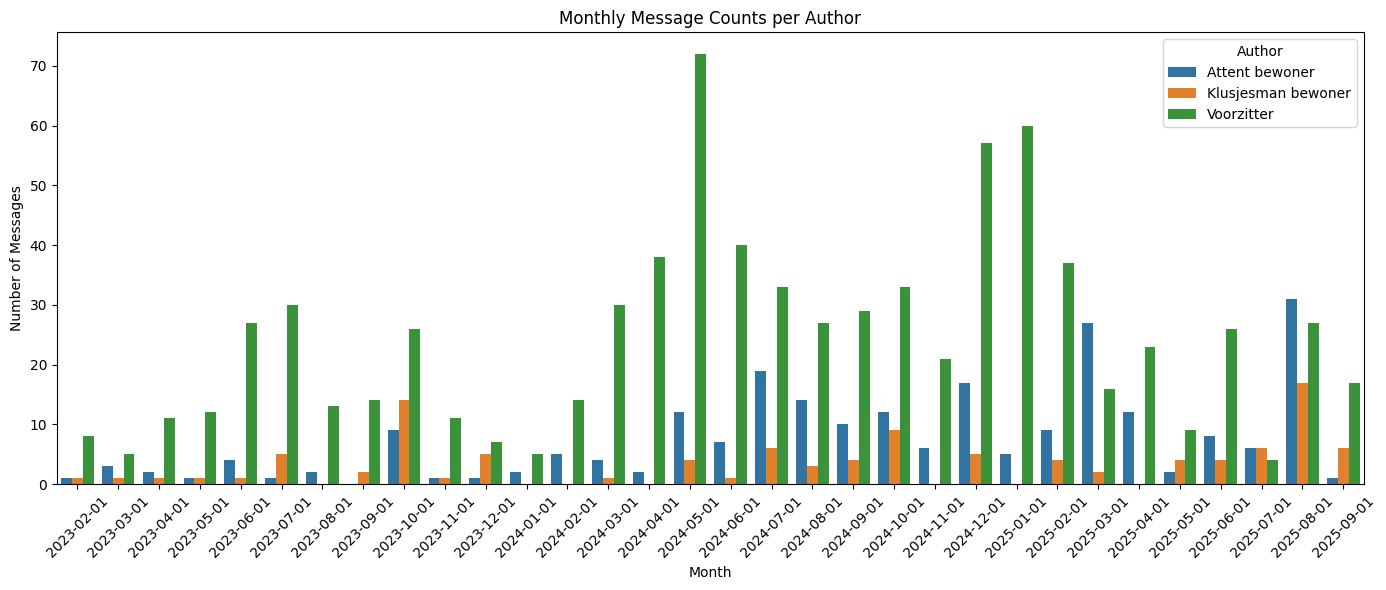

In [145]:
# Plot histogram / barplot
plt.figure(figsize=(14,6))
sns.barplot(
    data=monthly_counts,
    x='year_month',
    y='message_count',
    hue='author'
)
plt.xticks(rotation=45)
plt.title("Monthly Message Counts per Author")
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.legend(title="Author")
plt.tight_layout()
plt.show()

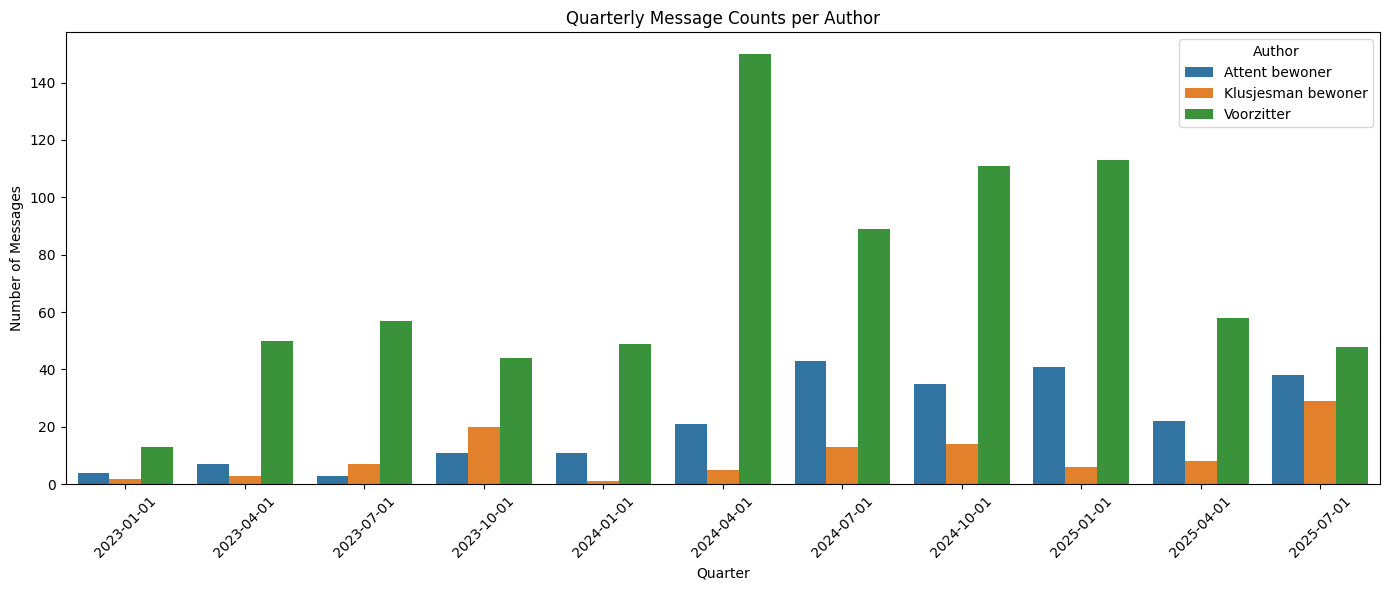

In [147]:
# Plot histogram/barplot per quarter
plt.figure(figsize=(14,6))
sns.barplot(
    data=quarterly_counts,
    x='year_quarter',
    y='message_count',
    hue='author'
)
plt.xticks(rotation=45)
plt.title("Quarterly Message Counts per Author")
plt.xlabel("Quarter")
plt.ylabel("Number of Messages")
plt.legend(title="Author")
plt.tight_layout()
plt.show()

In [159]:
# Filter dataset for "Klusjesman bewoner"
klusjesman_data = quarterly_counts[quarterly_counts['author'] == 'Klusjesman bewoner']

# Plot histogram/barplot per quarter for Klusjesman bewoner
plt.figure(figsize=(14,6))
sns.barplot(
    data=klusjesman_data,
    x='year_quarter',
    y='message_count'
)
plt.xticks(rotation=45)
plt.title("Quarterly Message Counts for Klusjesman bewoner")
plt.xlabel("Quarter")
plt.ylabel("Number of Messages")
plt.tight_layout()
plt.show()


KeyError: 'author'

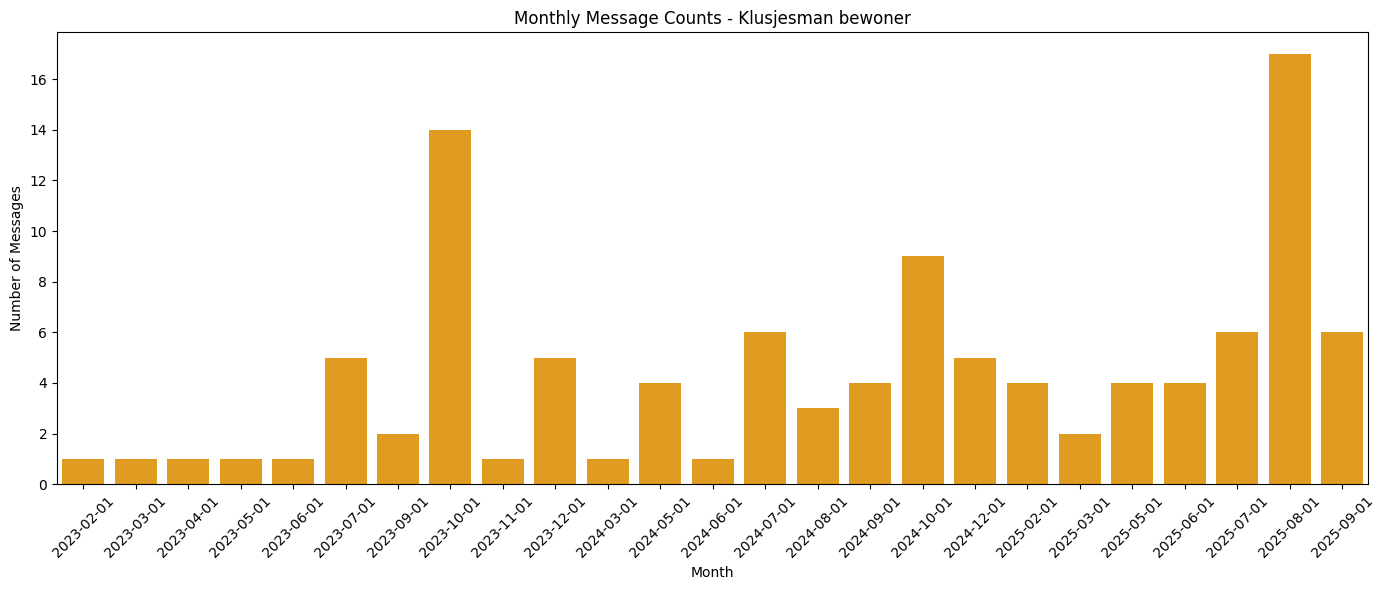

In [148]:
# Filter for only 'Klusjesman bewoner'
klusjesman_counts = monthly_counts[monthly_counts['author'] == 'Klusjesman bewoner']

# Plot
plt.figure(figsize=(14,6))
sns.barplot(
    data=klusjesman_counts,
    x='year_month',
    y='message_count',
    color="orange"  # Optional: single color since only 1 author
)
plt.xticks(rotation=45)
plt.title("Monthly Message Counts - Klusjesman bewoner")
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.tight_layout()
plt.show()


In [158]:
# Filter for only 'Klusjesman bewoner'
klusjesman_df = monthly_counts[monthly_counts['author'] == 'Klusjesman bewoner'].copy()

# Group by quarter instead of month
quarterly_counts = (
    klusjesman_df.groupby('year_quarter')['message_count']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(
    data=quarterly_counts,
    x='year_quarter',
    y='message_count',
    color="orange"
)
plt.xticks(rotation=45)
plt.title("Quarterly Message Counts - Klusjesman bewoner")
plt.xlabel("Quarter")
plt.ylabel("Number of Messages")
plt.tight_layout()
plt.show()


KeyError: 'year_quarter'

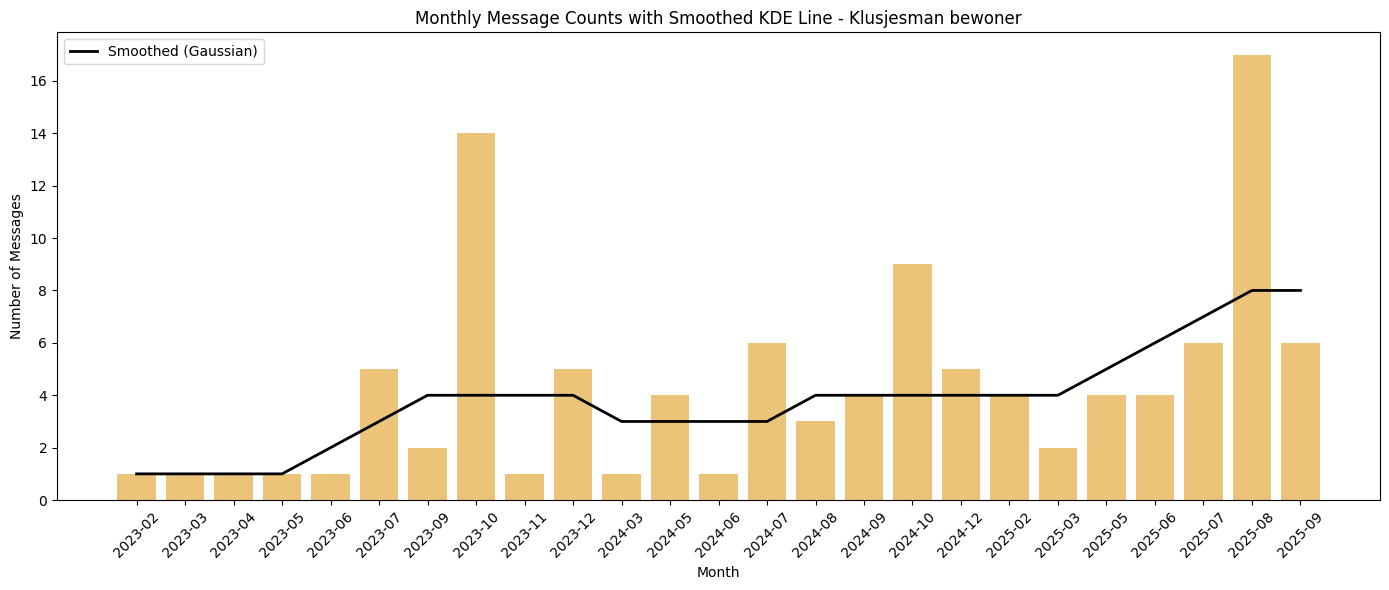

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

# Filter only Klusjesman
klusjesman_counts = monthly_counts[monthly_counts['author'] == 'Klusjesman bewoner'].copy()

# Create numeric index
klusjesman_counts['month_index'] = range(len(klusjesman_counts))

plt.figure(figsize=(14,6))

# Bar plot (histogram of counts)
sns.barplot(
    data=klusjesman_counts,
    x='month_index',
    y='message_count',
    color="orange",
    alpha=0.6
)

# Apply Gaussian smoothing to the counts
smoothed = gaussian_filter1d(klusjesman_counts['message_count'], sigma=2)

# Plot smoothed line
plt.plot(
    klusjesman_counts['month_index'],
    smoothed,
    color="black",
    linewidth=2,
    label="Smoothed (Gaussian)"
)

# Replace numeric x-axis with actual months
plt.xticks(
    ticks=klusjesman_counts['month_index'],
    labels=klusjesman_counts['year_month'].dt.strftime('%Y-%m'),
    rotation=45
)

plt.title("Monthly Message Counts with Smoothed KDE Line - Klusjesman bewoner")
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.legend()
plt.tight_layout()
plt.show()
